<a href="https://colab.research.google.com/github/tejasri2005/Machine-Learning/blob/main/Locally_weighted_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

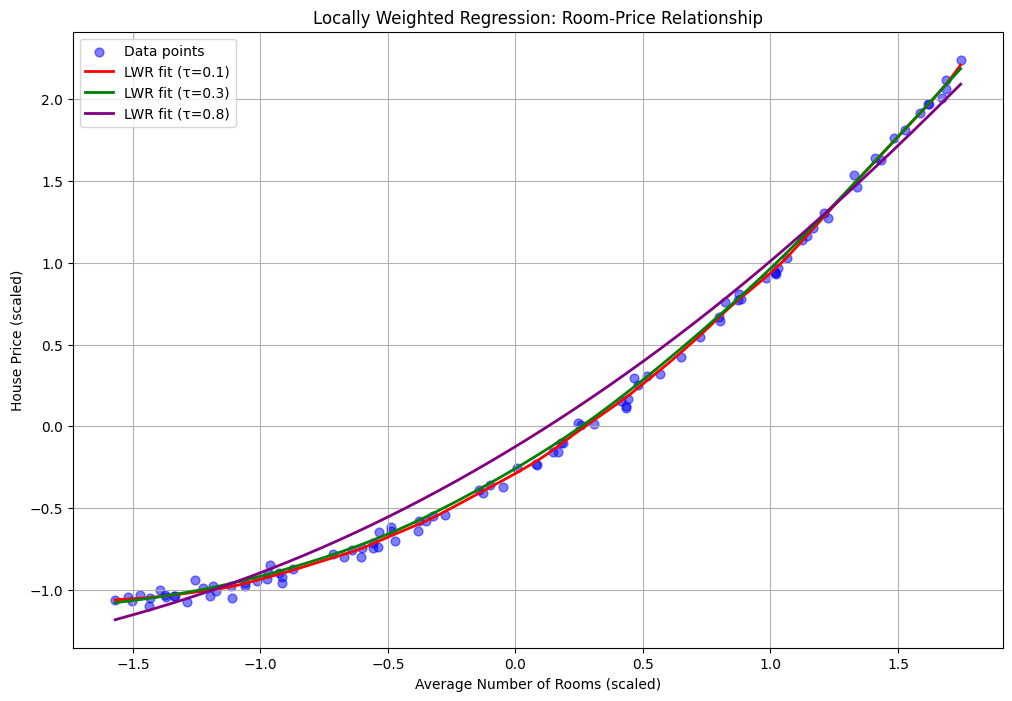

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def local_weight_regression(x, X, y, tau):

    # Add bias term
    X_b = np.c_[X, np.ones(X.shape[0])]

    # Calculate weights (Gaussian kernel)
    weights = np.exp(-(X - x)**2 / (2 * tau**2))
    W = np.diag(weights.flatten())

    # Weighted least squares solution
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ (X_b.T @ W @ y)

    # Predict for query point
    return np.array([x, 1]) @ theta

def plot_lwr(X, y, tau_values, title):

    plt.figure(figsize=(12, 8))

    # Generate test points
    X_test = np.linspace(X.min(), X.max(), 300)

    # Plot original data
    plt.scatter(X, y, color='blue', s=40, alpha=0.5, label='Data points')

    # Plot LWR fits for each tau
    colors = ['red', 'green', 'purple']
    for tau, color in zip(tau_values, colors):
        y_pred = np.array([local_weight_regression(x, X, y, tau) for x in X_test])
        plt.plot(X_test, y_pred, color=color, linewidth=2,
                label=f'LWR fit (τ={tau})')

    plt.xlabel('Average Number of Rooms (scaled)')
    plt.ylabel('House Price (scaled)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Create synthetic housing dataset (rooms vs price)
np.random.seed(42)
rooms = np.random.uniform(3, 8, 100)
price = 50*(rooms-3)**2 + 20*rooms + np.random.normal(0, 15, 100)

# Reshape and scale data
X = rooms.reshape(-1, 1)
y = price
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Run LWR with different bandwidths
plot_lwr(X_scaled, y_scaled,
         tau_values=[0.1, 0.3, 0.8],
         title='Locally Weighted Regression: Room-Price Relationship')